### Libraries import

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.stats import zscore
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.preprocessing import StandardScaler

### Reading the dataset

In [39]:
# configure load_wine to split data into features X and labels y
X, y = load_wine(as_frame=True, return_X_y=True)
# deep copy the features
df = X.copy()
# deliberately set targets (labels) to all zeros
df['target'] = 0
# we'll use the true labels in y in the subsequent task!


### Basic info about the dataset

In [40]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [41]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.0
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.0
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.0
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.0
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,0.0
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,0.0


# Unlabeled Data

#### Methods used in ex.1.1

In [95]:
# plotting th eline plot of every feature in one plot
def generate_line_plot(data_frame):
    return data_frame.plot()

# plotting th eline plot of every feature in separate plots
def gather_data(dataframe ,label : str) -> tuple():
    # all values from given feature
    feature_values = dataframe[label].values.tolist()

    # size of the list
    amount = len(feature_values)

    feature_range = [i for i in range(0, amount)]

    return feature_values, feature_range

def line_plot_data(x_values:list[int], y_values: list[float], ax: plt.axes):

    ax.plot(x_values, y_values)
    ax.set_xlabel("Sample number")


def line_plots_of_features():
    labels = df.columns
    labels = labels[0:-1]
    fig, axs = plt.subplots(3, 5, figsize=(20, 15))
    axs = axs.ravel()

    for i, label in enumerate(labels):
        feature_values, feature_range = gather_data(df, label)
        line_plot_data(feature_range, feature_values, axs[i])
        axs[i].set_title(f'{label} in wine sample')
        axs[i].set_ylabel(f'{label} value')


# for plotting heatmap
def plot_heatmap(data_frame):
    heatmap_df = data_frame.copy()
    heatmap_df = heatmap_df.apply(zscore)
    sns.heatmap(heatmap_df, cmap='coolwarm_r')


# for plotting parallel lines
def plot_parrallel_lines(data_frame, iflabel=False):
    unlabeled_df = data_frame.copy()
    if iflabel:
        unlabeled_df['target'] = y
    else:
        unlabeled_df['target'] = 0
    plt.figure(figsize=(15, 10))
    plt.title('Parallel Coordinates Plot')
    parallel_coordinates(unlabeled_df, 'target', colormap='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Feature values')
    plt.legend(loc="upper left", title="Wine Class")


### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

In [71]:
targetless_df = df.copy()
targetless_df.drop(columns='target', inplace=True)

### Line plot of all features

<Axes: >

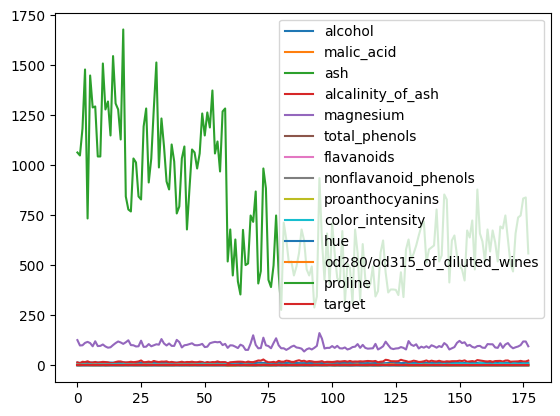

In [43]:
generate_line_plot(df)

As we can see the plot is unreadable for most of the measurements. We can only see ash values and magnesium on the scale. Rest of the features overlaps with themselves

### Plot line of each feature

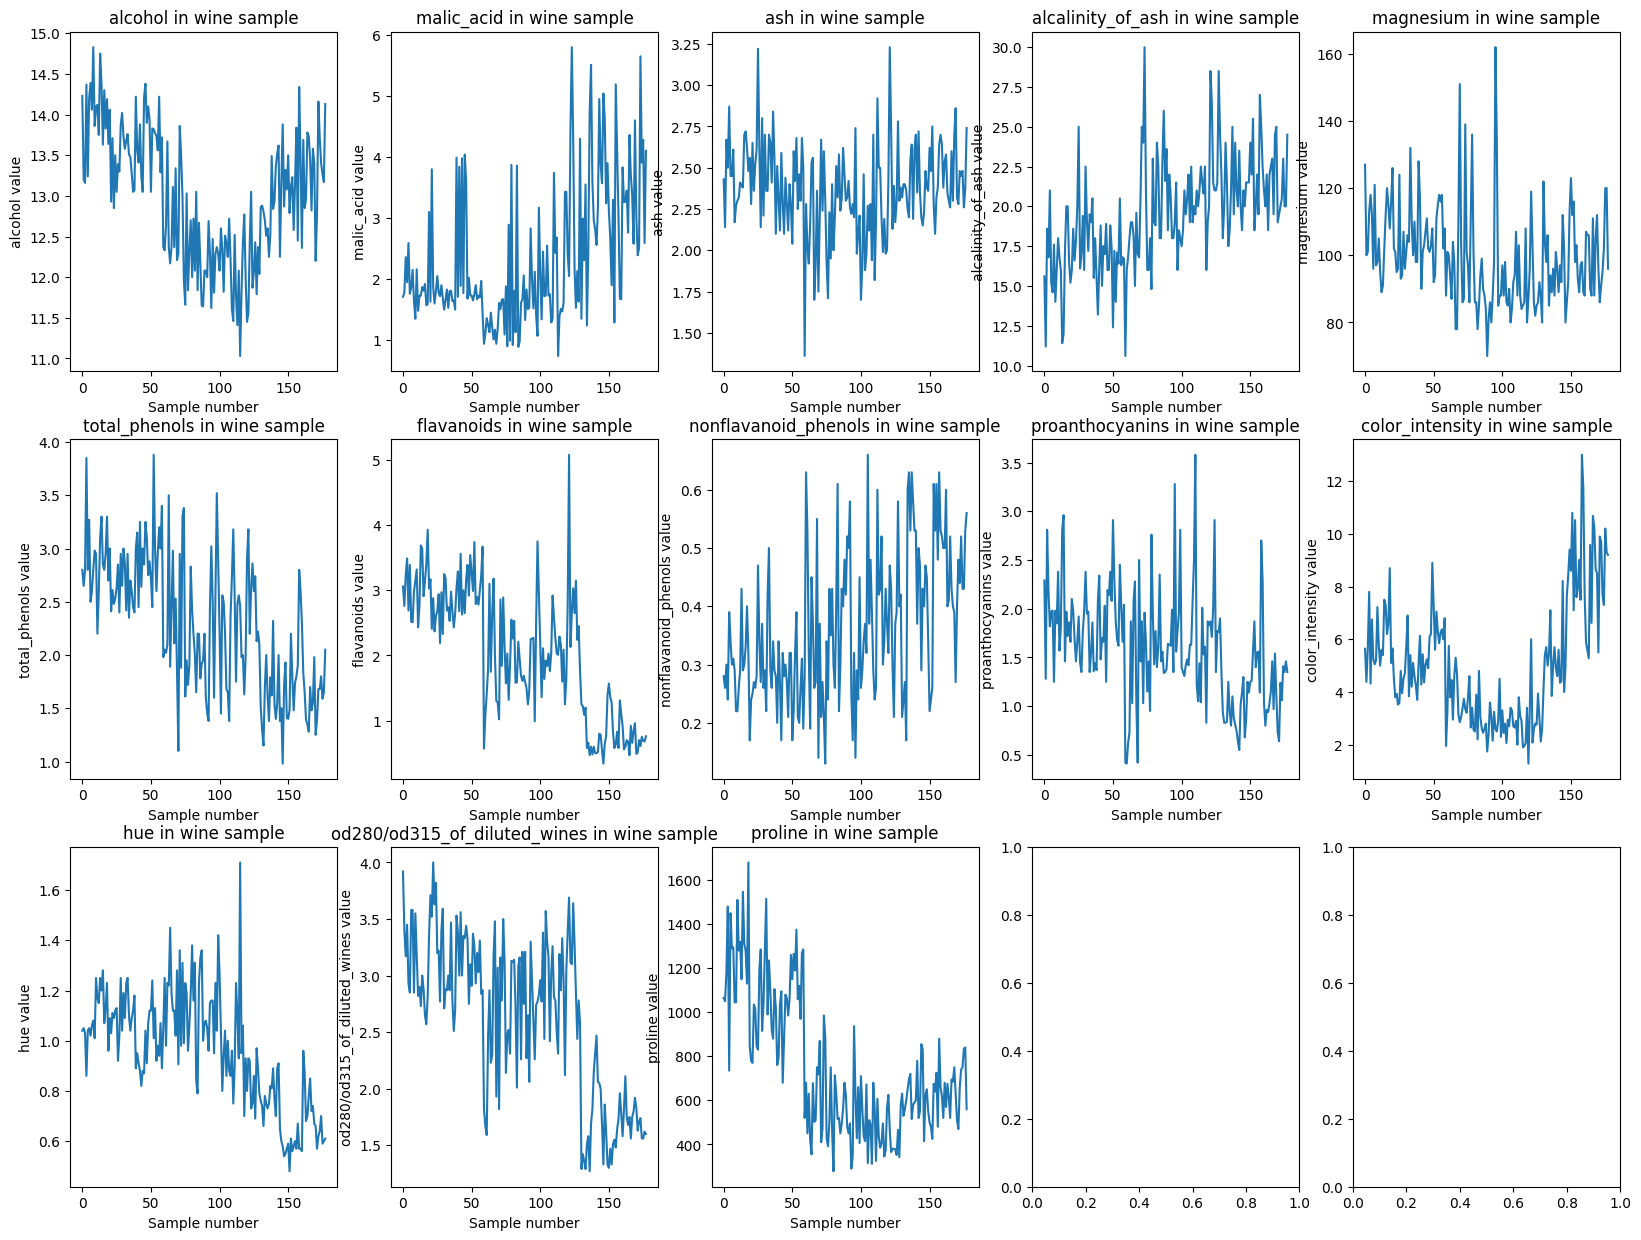

In [44]:
line_plots_of_features()

#### Heatmap

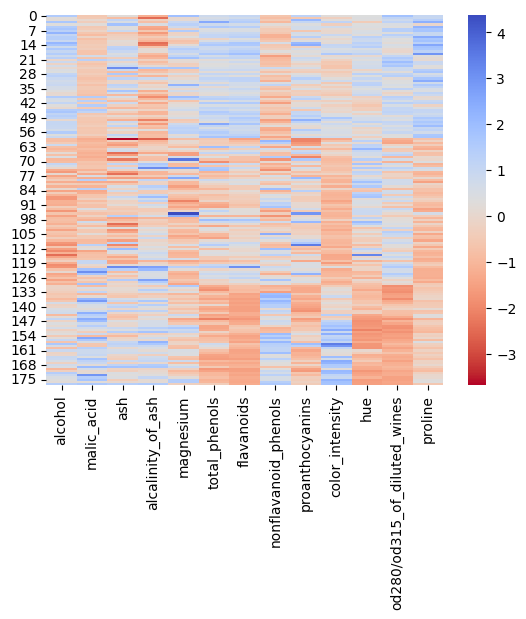

In [74]:
plot_heatmap(targetless_df)

#### Parallel lines plot

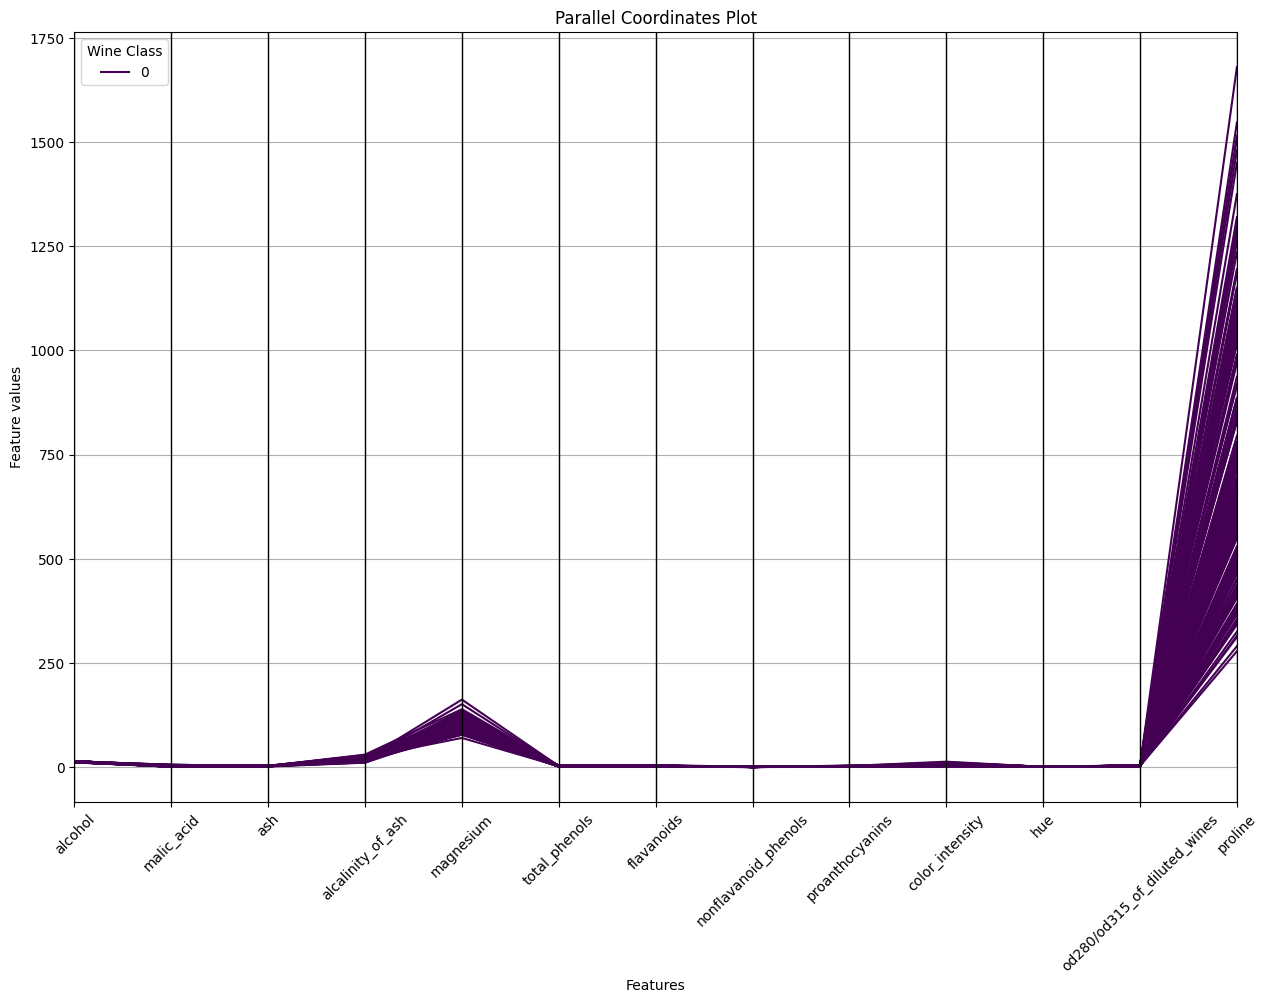

In [46]:
plot_parrallel_lines(df)

## 2. Decide whether the data needs scaling.

Just by looking at the plots we can see a huge difference between values in some features => it would be better to scale those values, by using for example z-scale

#### Methods used for ex.1.2

In [47]:
def slace_datascale_dataframe(data_frame):
    scaled_df = data_frame.apply(zscore)
    return scaled_df

### 3. Detect any outliers in the features’ distribution through means of a boxplot.

In [75]:
# for generating box plot
def generate_box_plot(data_frame):
    data_frame.boxplot(figsize=(20, 10), grid=True, rot=45)

# for generating box plot wihout proline
def generate_box_plot_without_proline(data_frame):
    box_plot_frame = data_frame.copy()
    box_plot_frame.drop(columns=['proline'], inplace=True)
    box_plot_frame.boxplot(figsize=(20, 10), grid=True, rot=45)

#### Methods used for ex.1.3

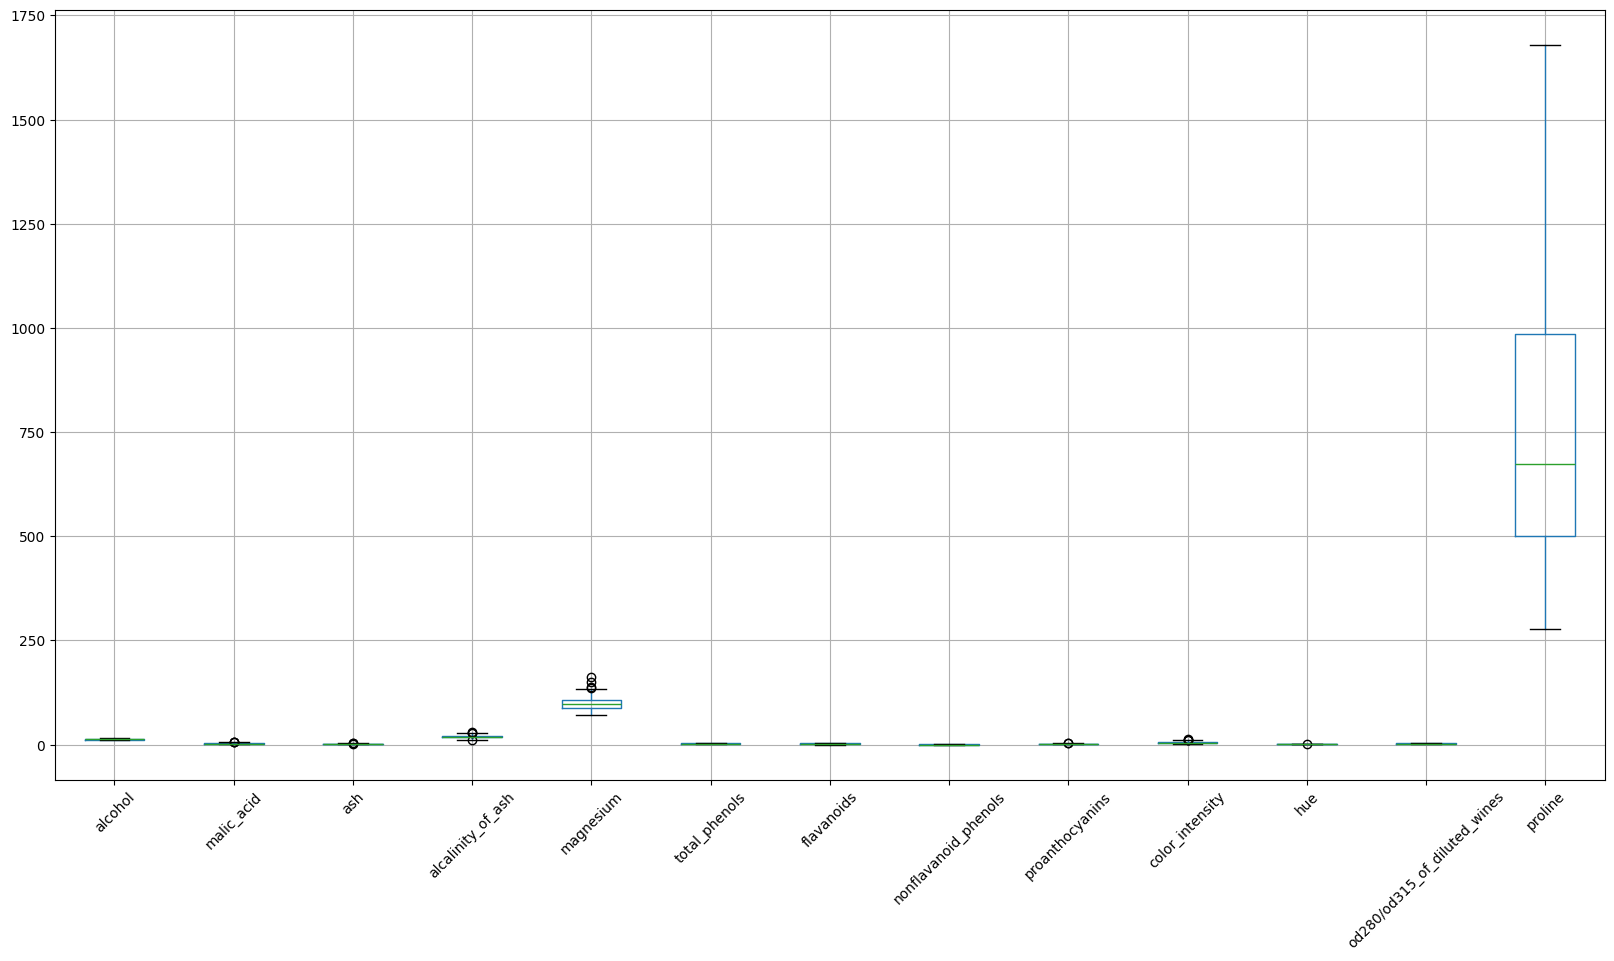

In [77]:
generate_box_plot(targetless_df)

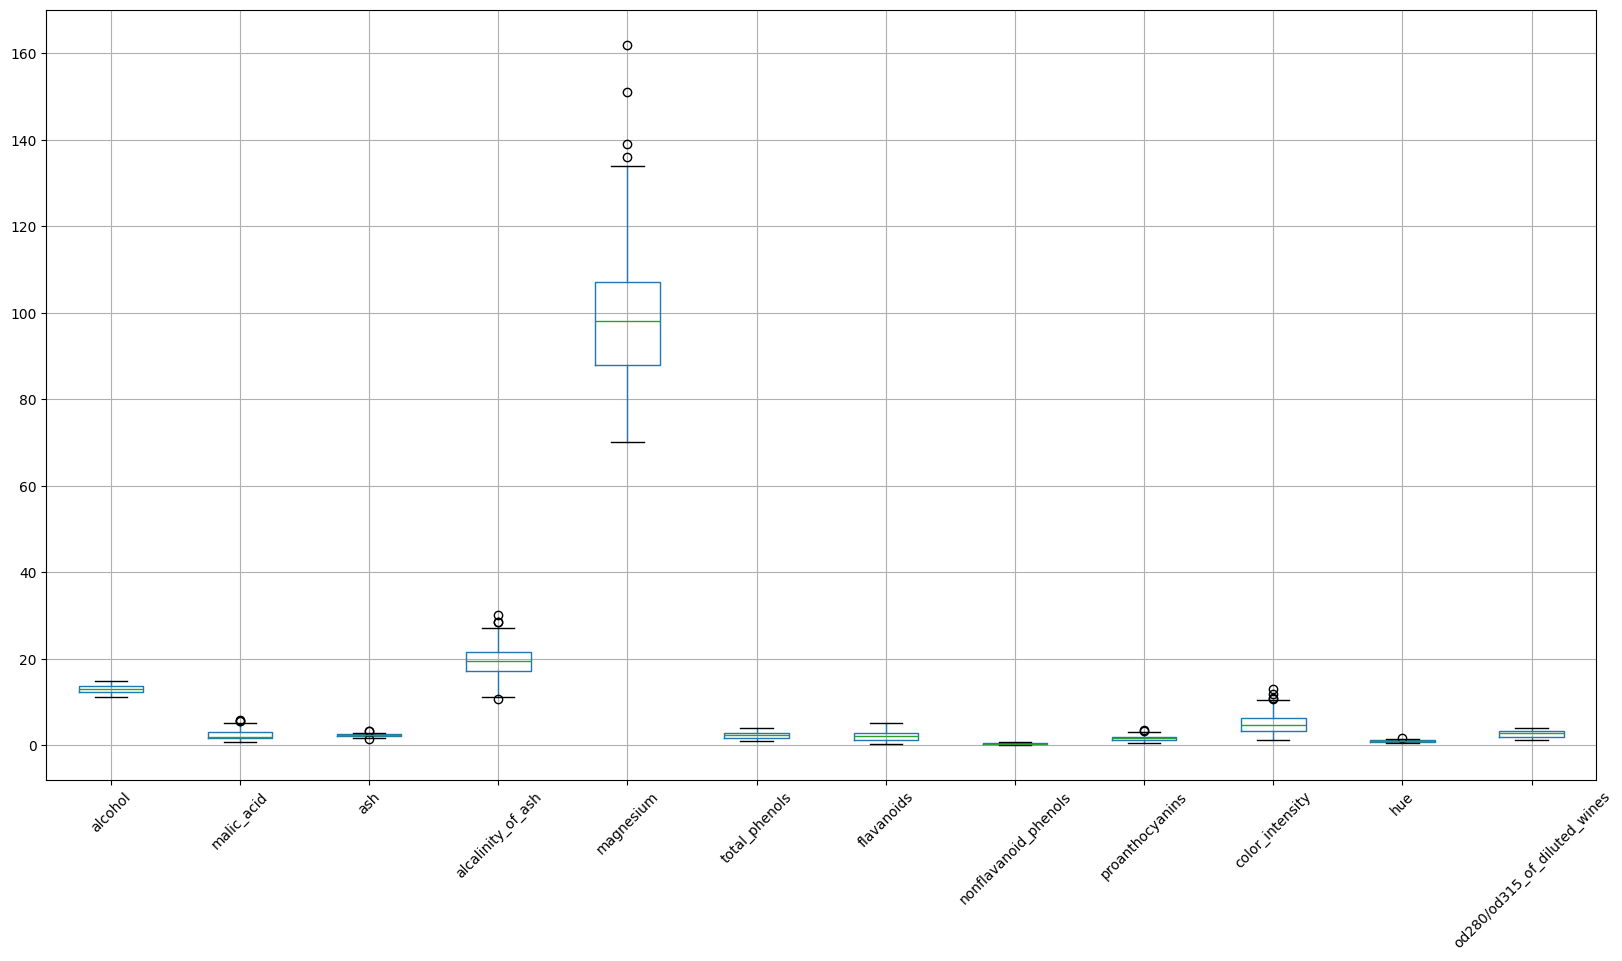

In [78]:
generate_box_plot_without_proline(targetless_df)

### 4. Find out which data points have outliers in any feature

We can see outliers in : 
- magnesium
- alcalinity_of_ash
- color intensity
- hue

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . ).

#### Methods used for ex.1.5

In [79]:
# for plotting violin plot
def plot_violin_plot(data_frame):
    plt.figure(figsize=(15, 10))
    sns.violinplot(data_frame)
    plt.xticks(rotation=45)


# for calculating correlation matrix
def calculate_corr_matrix(data_frame):
    copied_df = data_frame.copy()
    corr_matrix = copied_df.corr()
    return corr_matrix

# for plotting correlation matrix
def plot_corr_matrix(corr_matrix):
    sns.pairplot(corr_matrix)

# for plotting heatmap of correlation matrix
def plot_corr_heatmap(corr_matrix):
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=True)

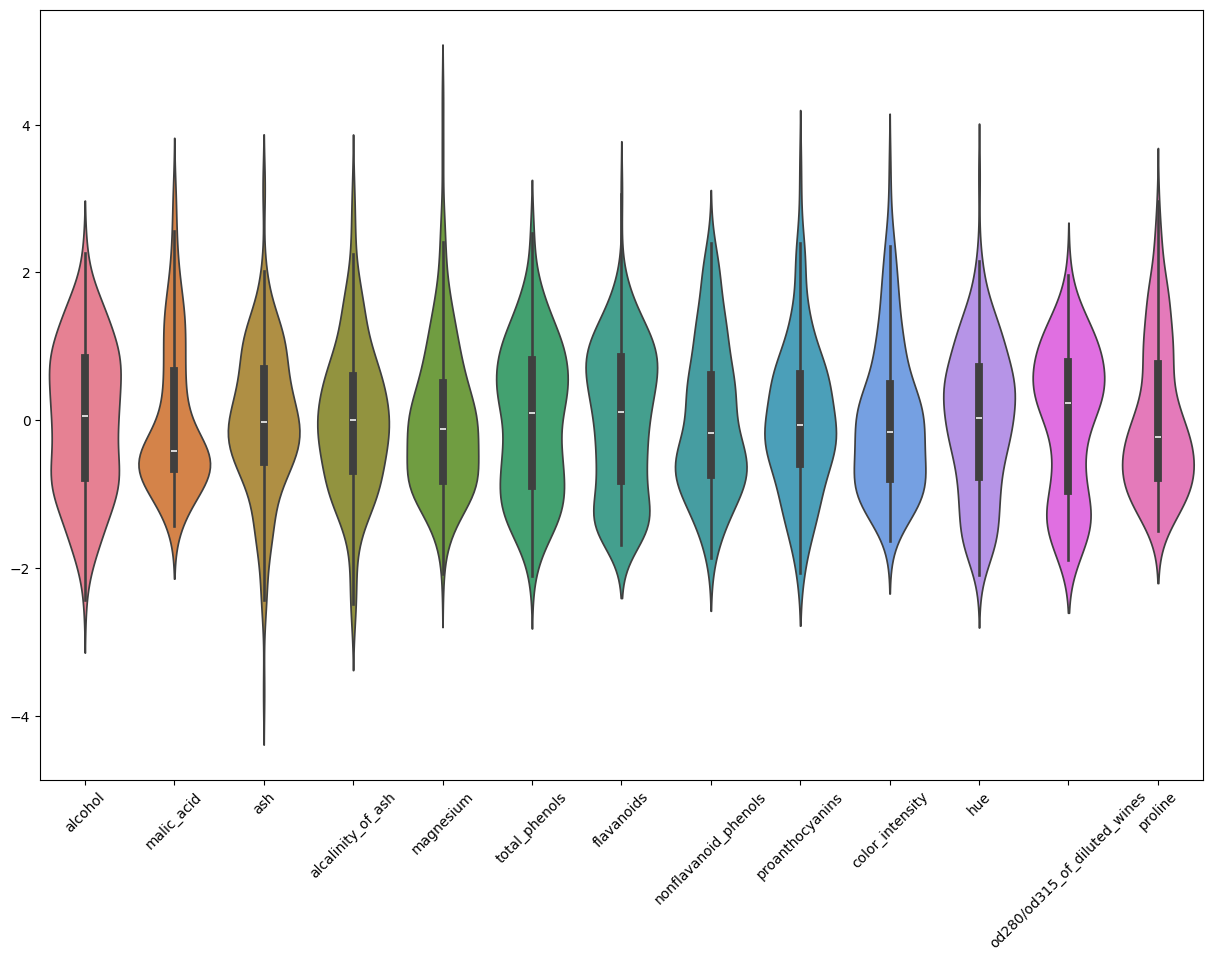

In [80]:
scaled_data_frame = slace_datascale_dataframe(targetless_df)
plot_violin_plot(scaled_data_frame)

### Corelation matrix

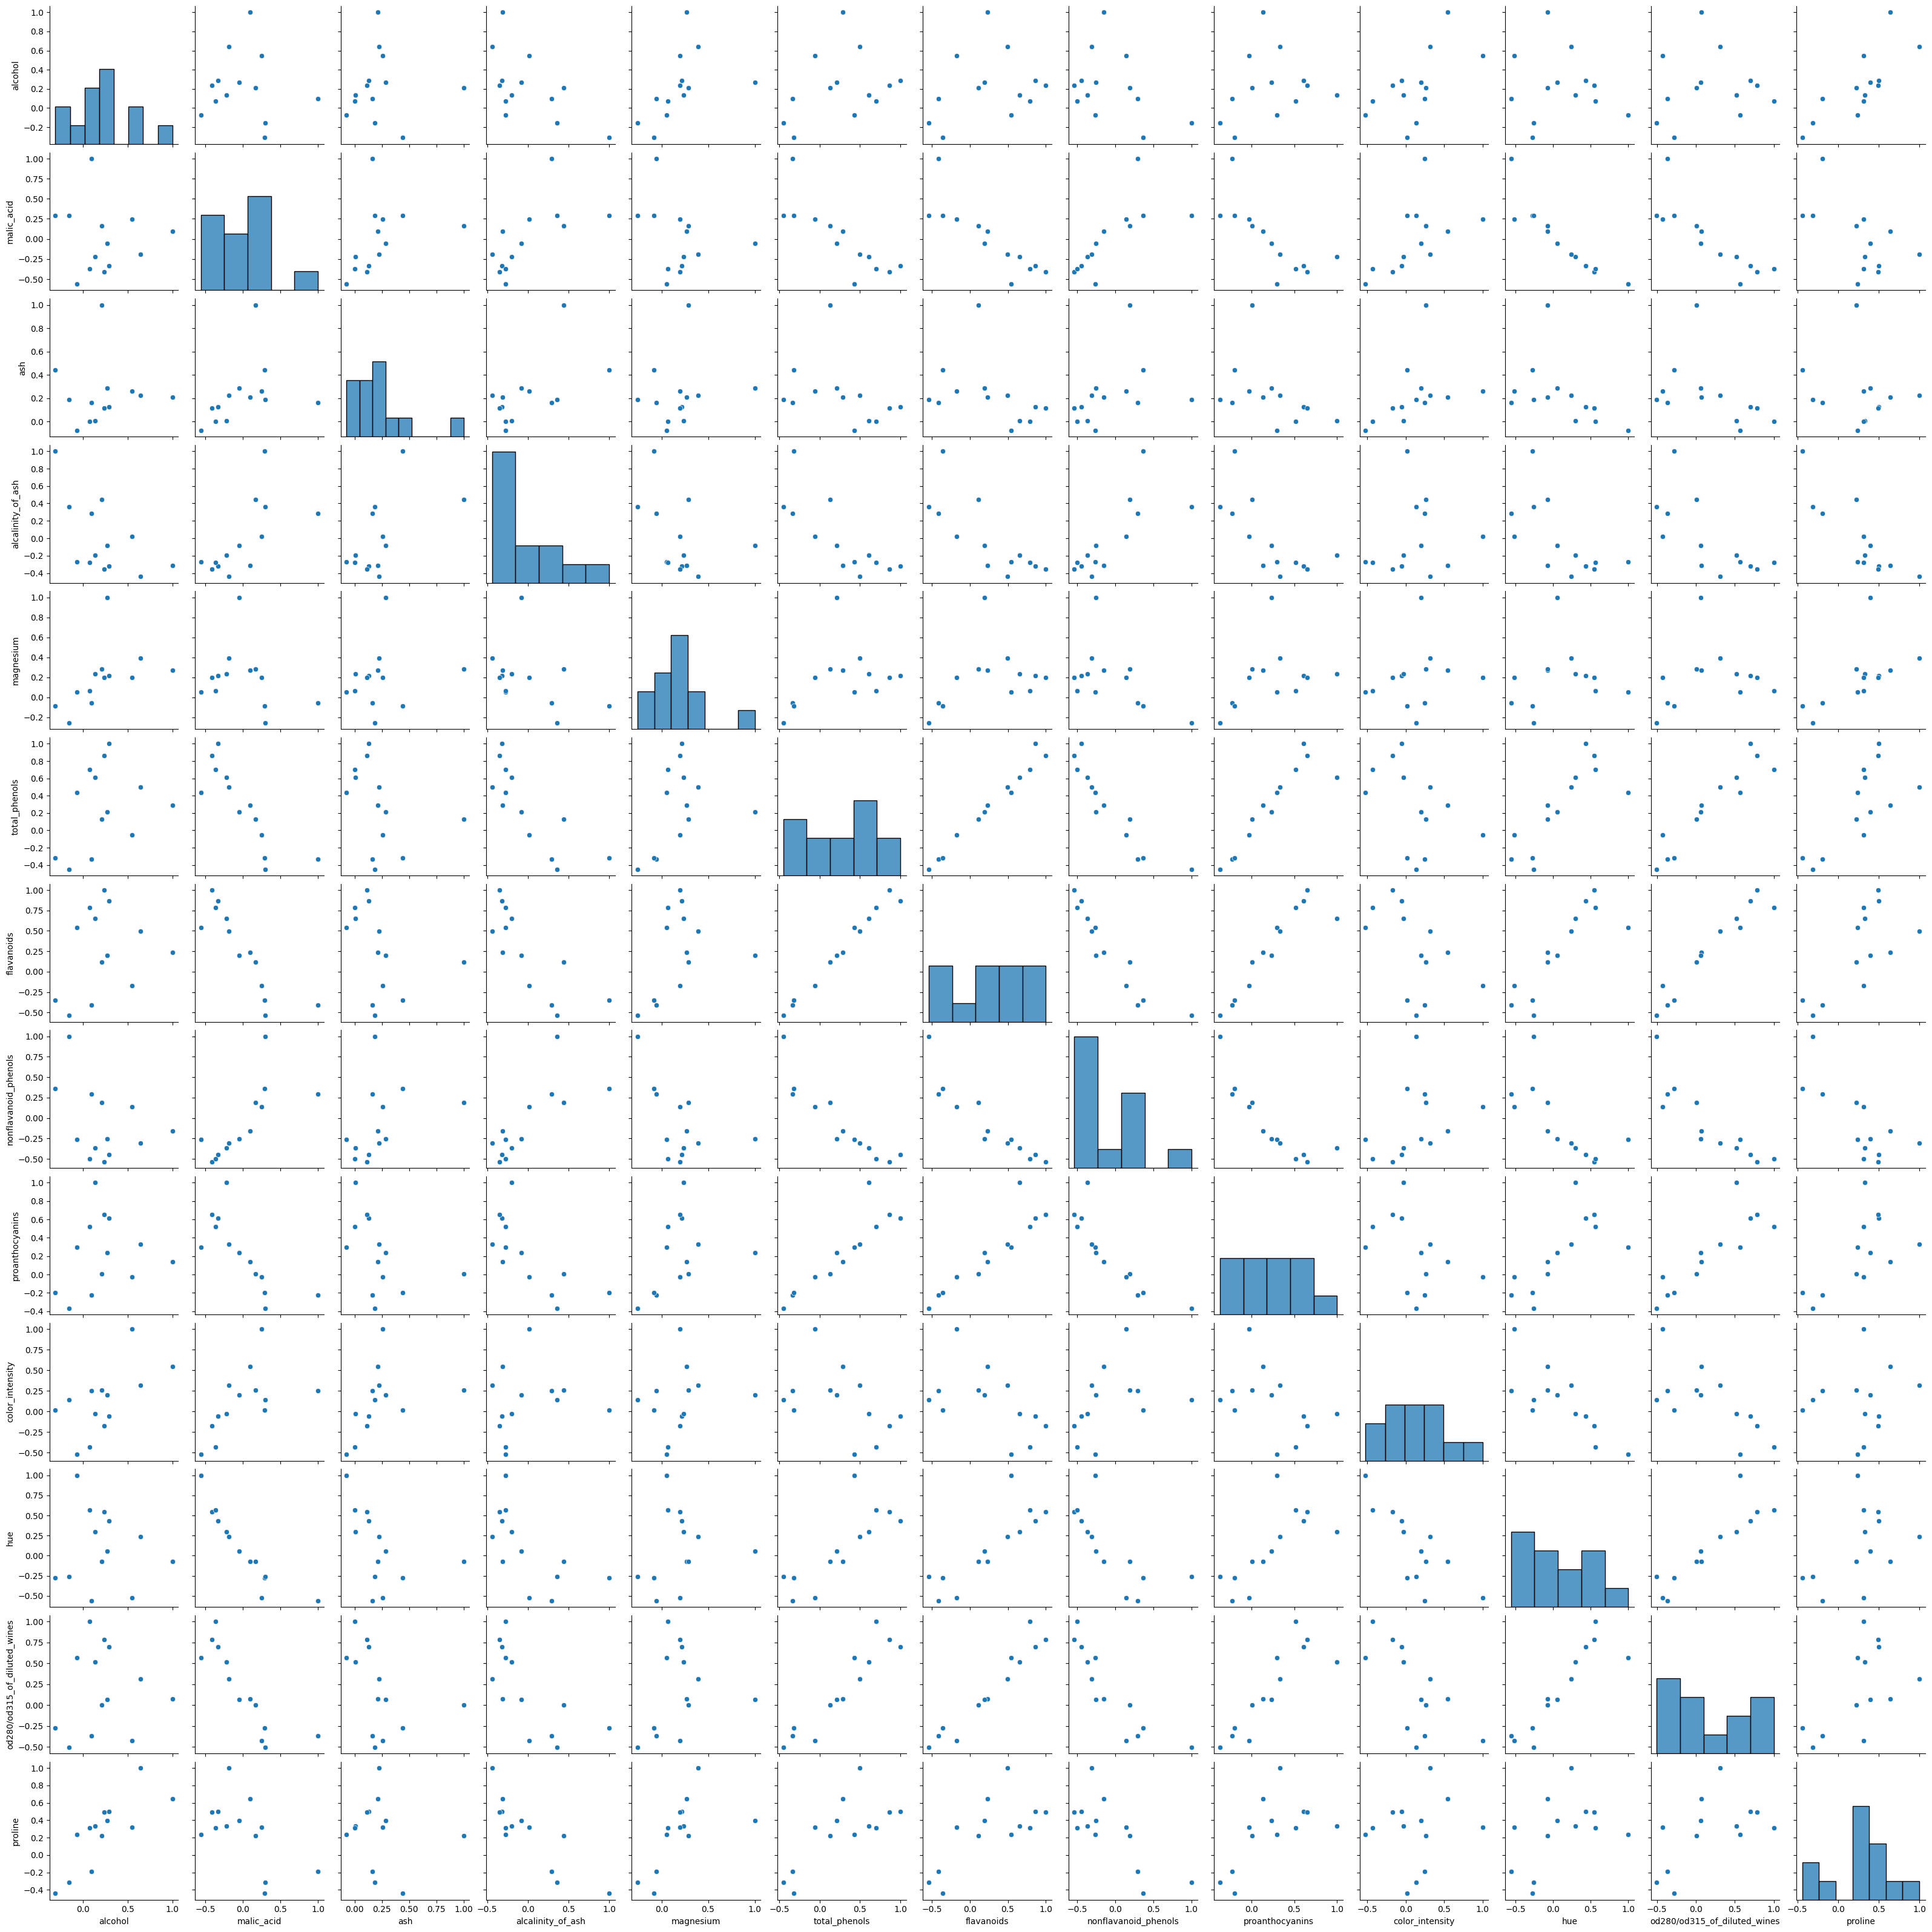

In [81]:
corr_matrix = calculate_corr_matrix(targetless_df)
plot_corr_matrix(corr_matrix)

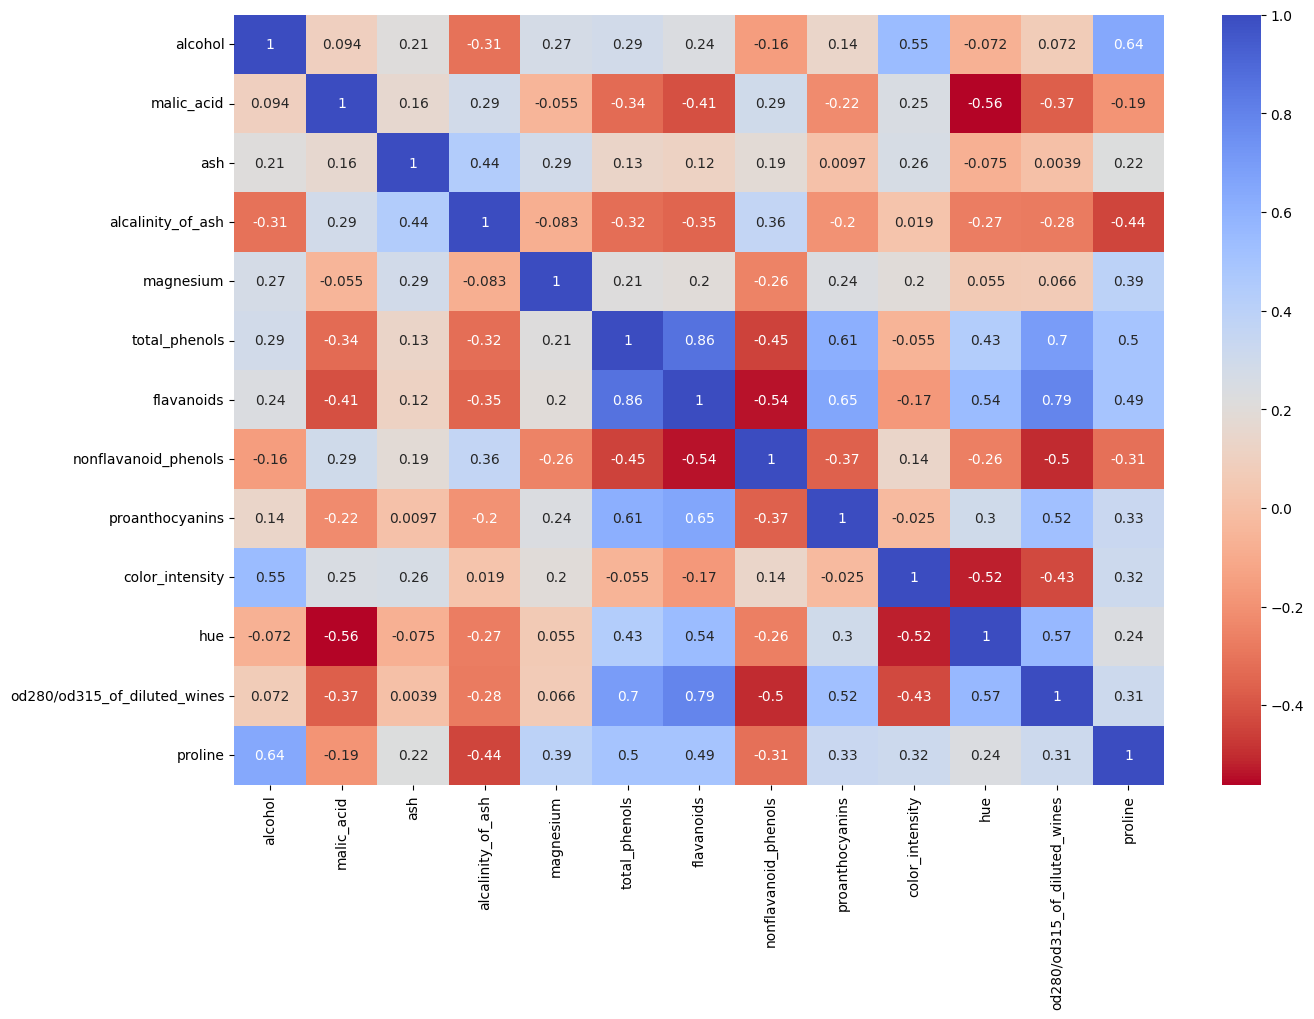

In [82]:
plot_corr_heatmap(corr_matrix)

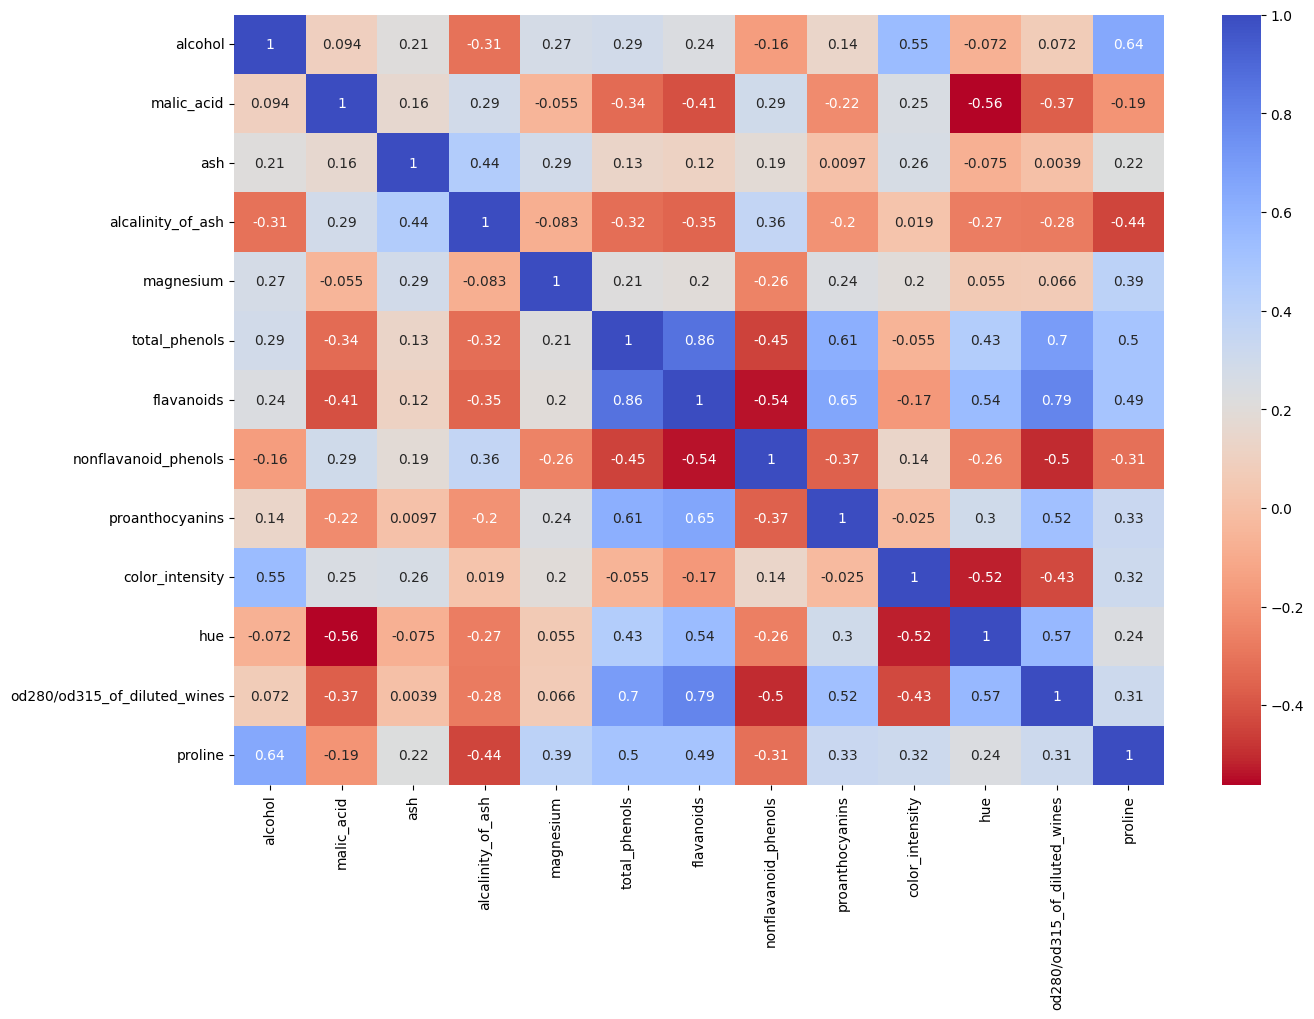

In [83]:
scale_corr_matrix = calculate_corr_matrix(scaled_data_frame)
plot_corr_heatmap(scale_corr_matrix)

# LABELED DATA

In [89]:
# set true labels in df to use them in plotting
label_df = df.copy()
label_df['target'] = y

In [90]:
label_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [92]:
label_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

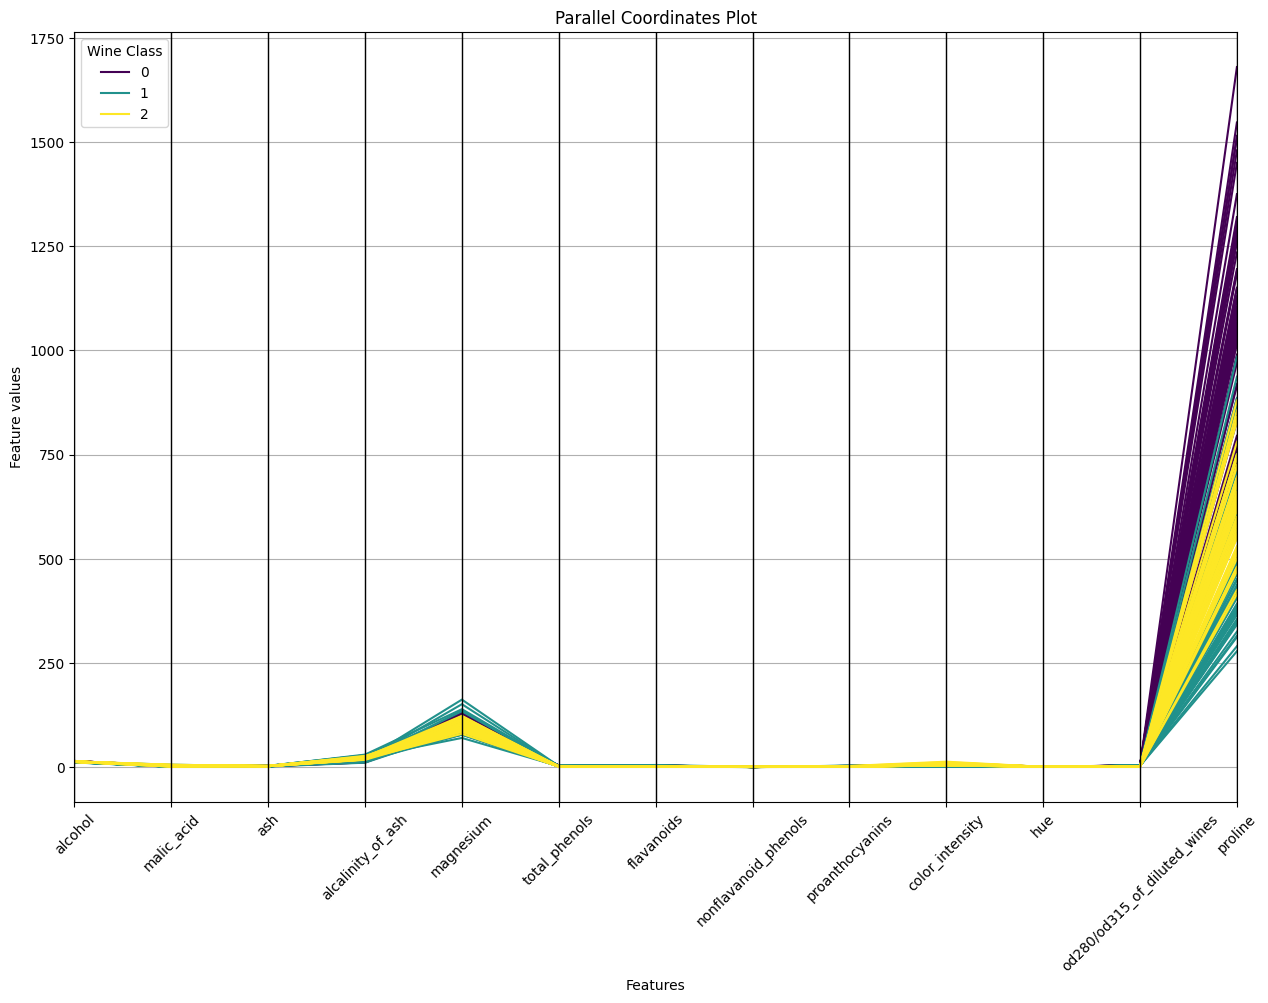

In [96]:
plot_parrallel_lines(label_df, iflabel=True)


### With scaled values

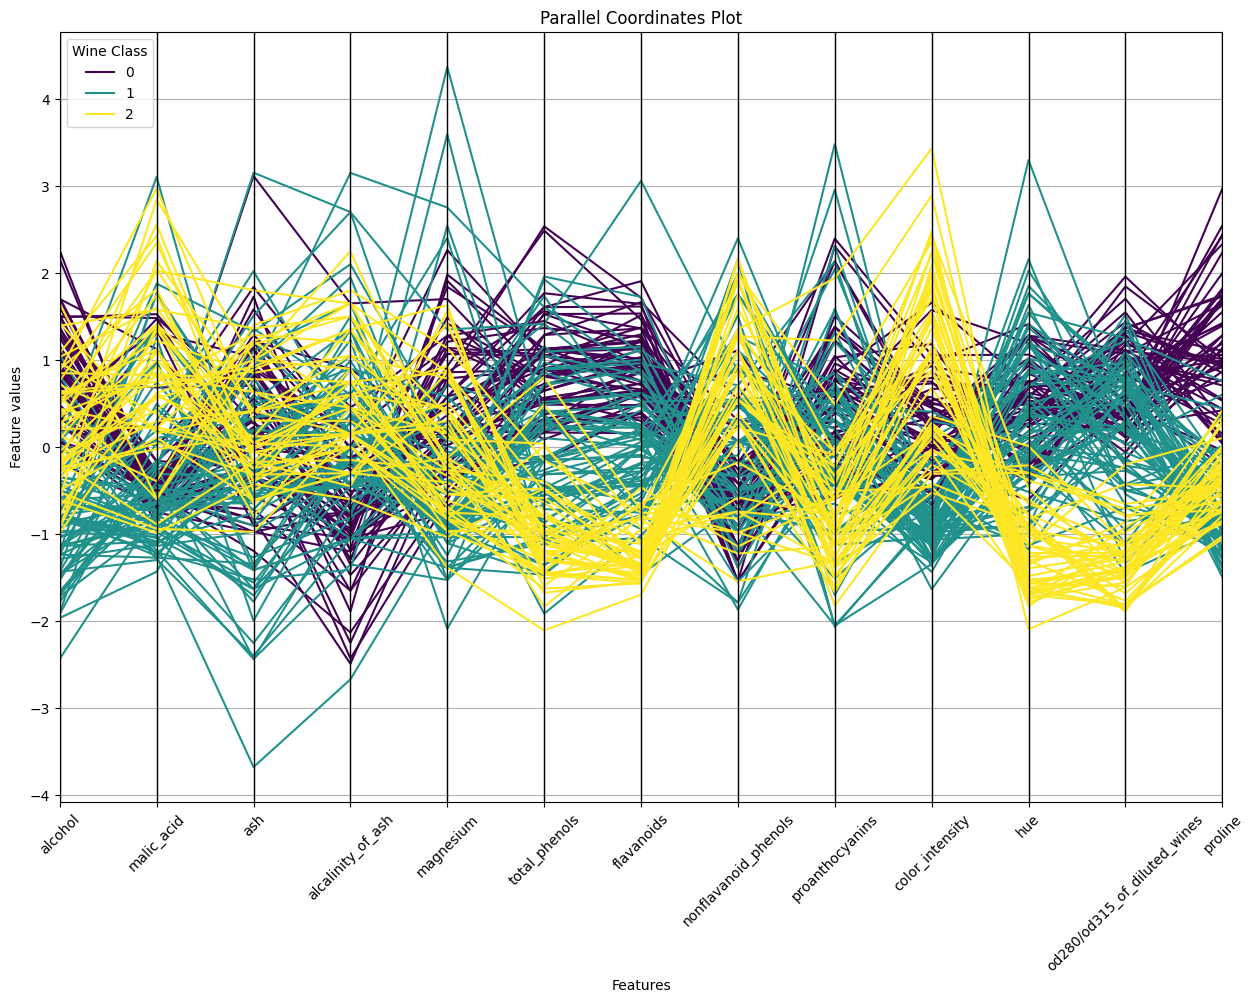

In [98]:
label_df_copy = label_df.copy()
scaled_label_df = slace_datascale_dataframe(label_df_copy)
plot_parrallel_lines(scaled_label_df, iflabel=True)

### 3. Detect any outliers in the features’ distribution through means of a boxplot.

#### Methods used in ex.2.3

In [103]:
# for generating groupd box plot
def generate_grouped_box_plot(data_frame):
    plt.figure(figsize=(15, 10))
    features = pd.Series(data_frame.columns)
    for feature in features:
        sns.boxplot(x='target', y=feature, data=data_frame)
        plt.title(f'Boxplot of {feature} by target')
        plt.show()

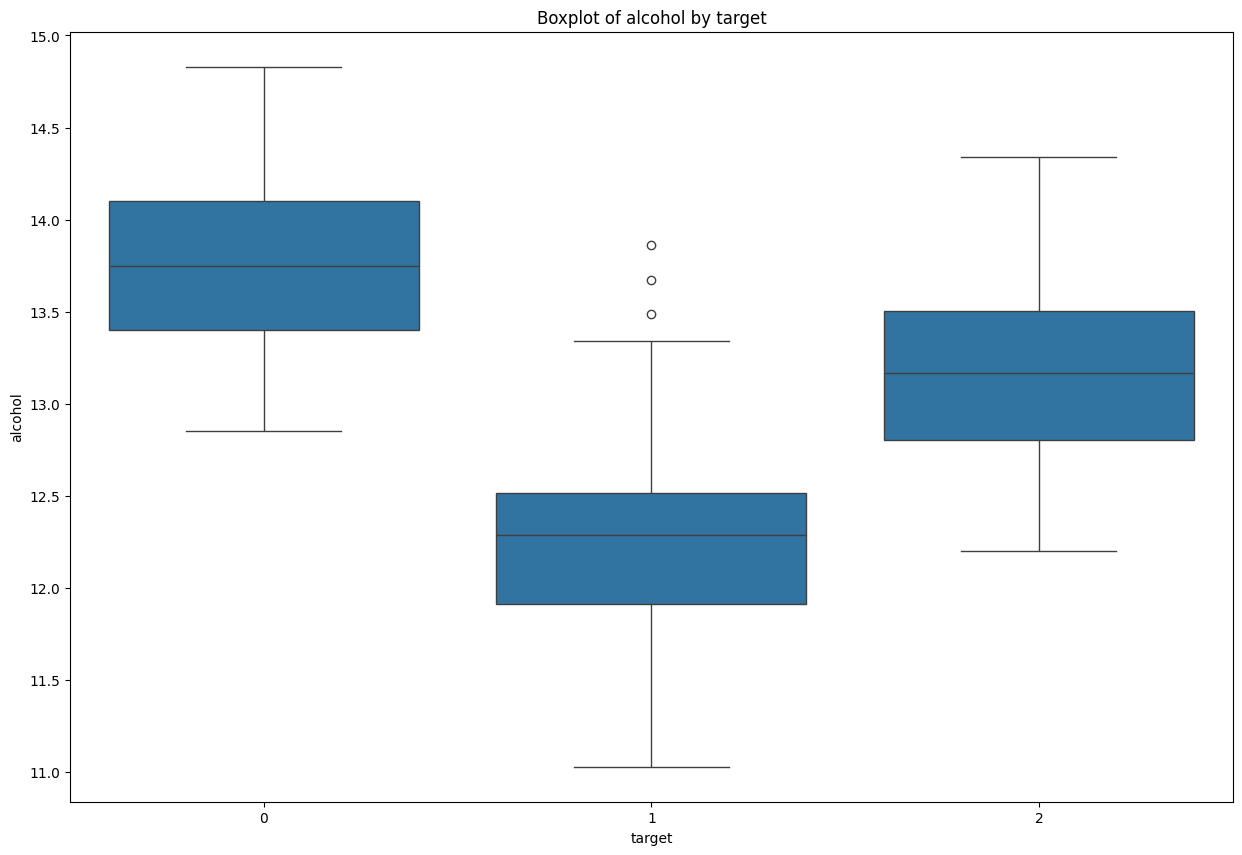

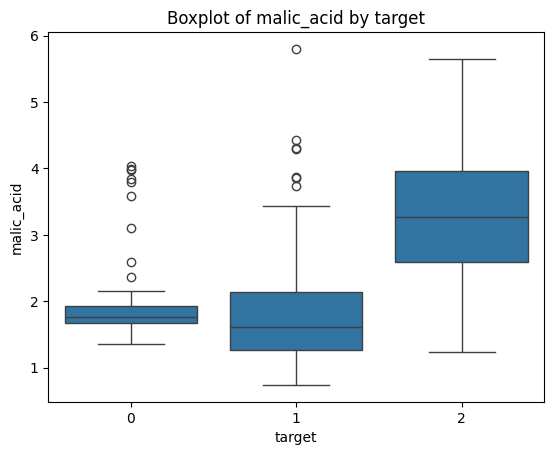

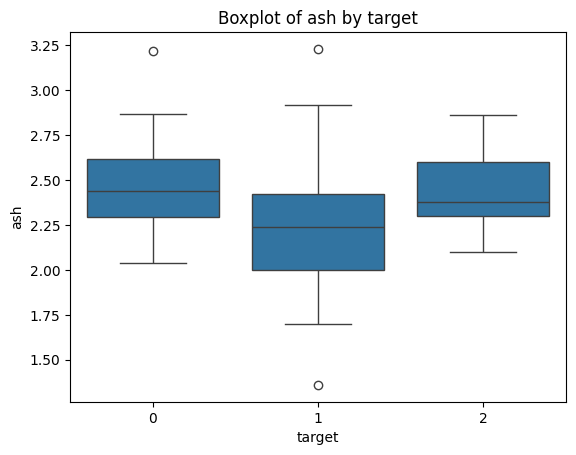

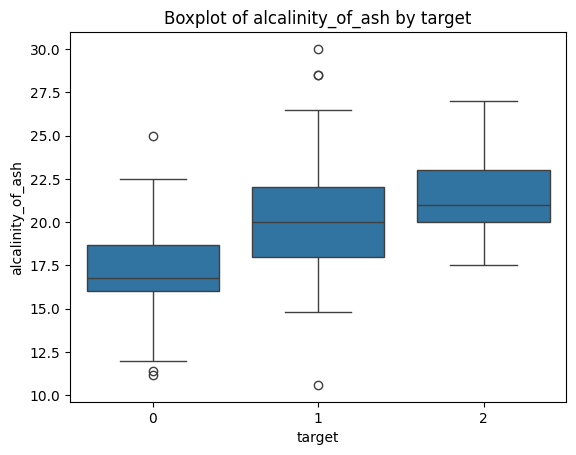

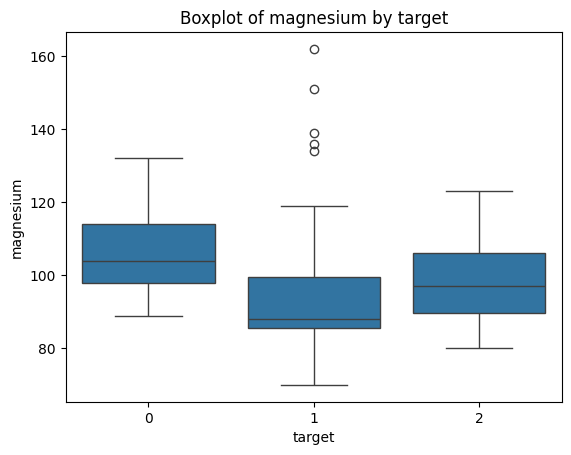

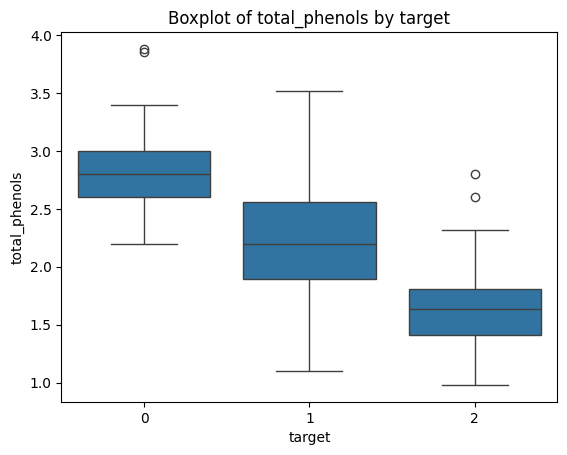

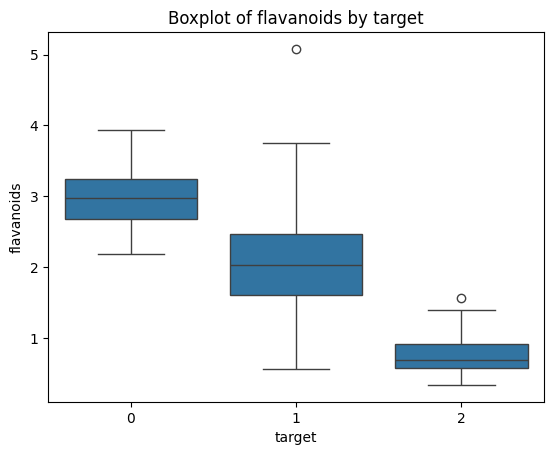

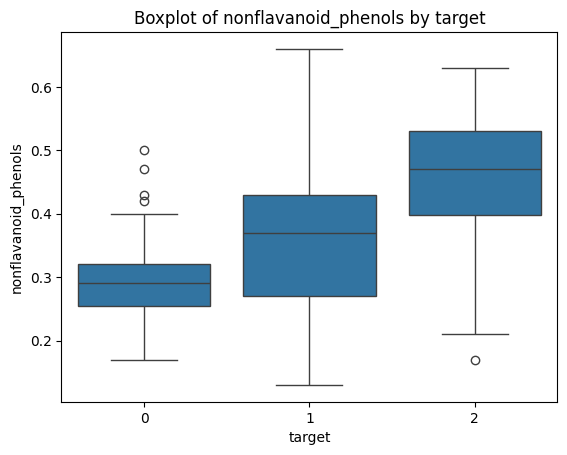

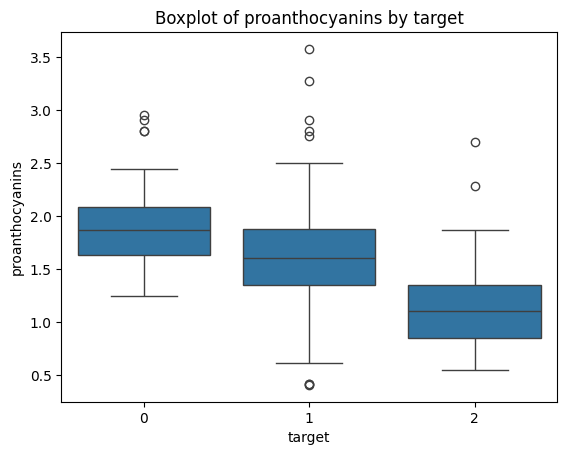

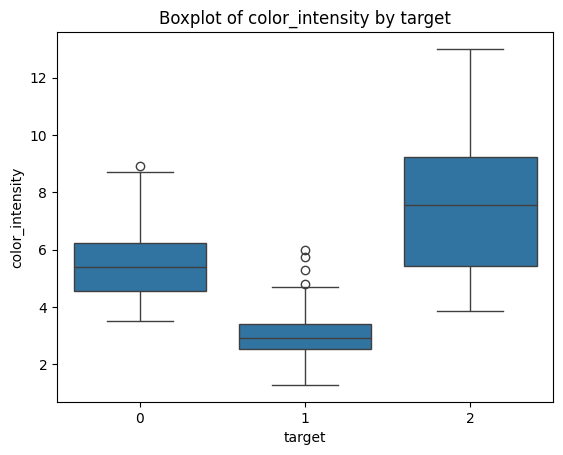

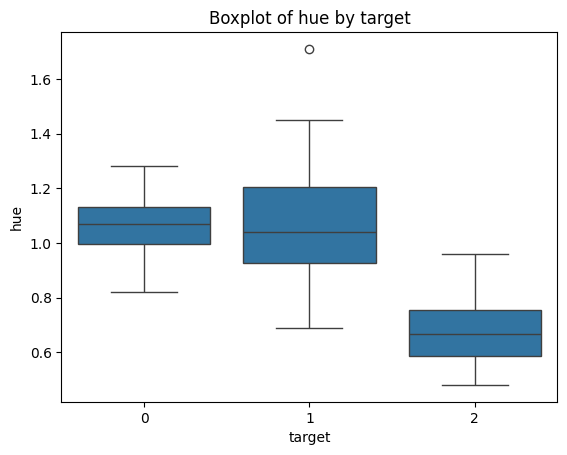

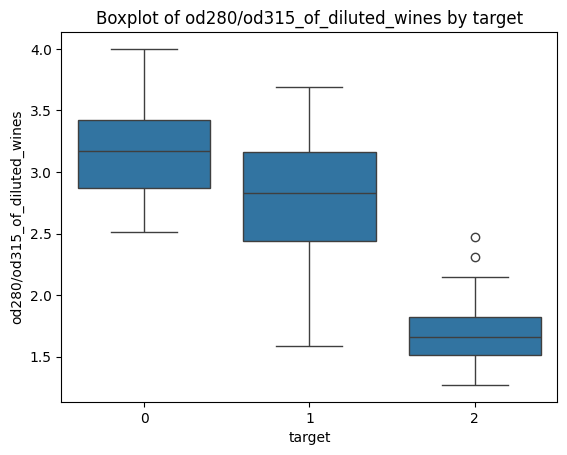

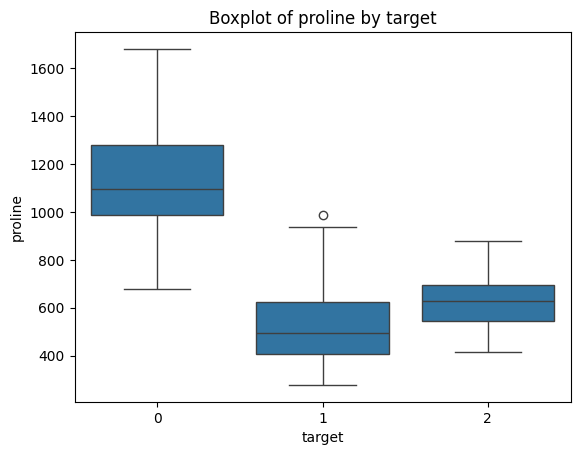

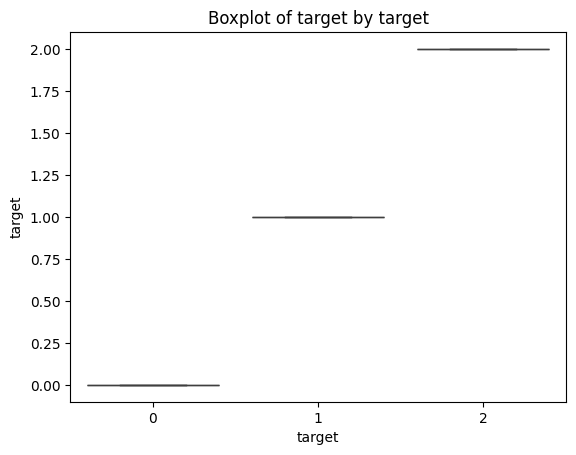

In [104]:
generate_grouped_box_plot(label_df)

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )